**Background**

Research in QML has been largely centered on how quantum kernels can be applied to Support Vector Machines (SVMs), with limited work extending these ideas to classical tree-based methods like kd-trees.

Quantum Kernels and SVMS
Quantum kernels use quantum circuits to map classical data into a high-dimensional quantum feature space, allowing for potential quantum advantages in classification tasks.

Quantums SVMs replace the classical kernel computation with the quantum inner products, exploiting entanglement and interference to potentially reveal data structures inaccessible to classical algorithms.

Significant research has evaluated the scaling, noise sensitivity, and empirical performance of QSVMs on both synthetic and real datasets.

Little research systematically comparing quantum SVMs (with quantum kernels) to kd-trees, especially regarding ambiguous boundary handling or noise robustness.

Unclassifiable or undetermined regions within the feature space signal the potential for kd-trees to recursively partition and resolve these areas. While SVMs can be robust to a certain extent, they are particularly vulnerable to noise in the quantum kernel, which can significantly degrade performance. However, some data states may be less sensitive to kernel noise—meaning their pairwise similarity metrics remain relatively stable even as the kernel experiences perturbations.


*Robustness Checks*

To ensure robust classification, it is important to optimize the kernel so that the states of interest are not only robust to noise but also easily classifiable. This requires thorough robustness checks, such as testing under various noise conditions and comparing "easy" versus "difficult" datasets. Such experiments would help determine whether easily classifiable data is indeed less affected by kernel noise compared to more complex or overlapping cases.

*Research Direction*
If the focus is on identifying and leveraging robust, easily classifiable states, the precise positioning of decision boundaries becomes less critical. Kd-trees could then serve to efficiently partition and manage "unclassifiable" or "undetermined" regions, using their recursive nearest-neighbor structure to resolve ambiguities—potentially addressing “m-state” issues where data points are particularly ambiguous.

**Project Outline**
Comparitive Analysis of Quantum Kernel SVM and KD-Tree Methods (With and Without Dimensionality Reduction) for Robust Quantum Classification.


Motivation
- Quantum kernel methods for SVMs promise enhanced classification capabilities by leveraging quantum feature spaces, but their robustness under realistic noise and high-dimensional settings remains uncertain.
- KD-trees offer a deterministic, interpretable approach that may efficiently handle certain unclassifiable or ambiguous regions where quantum SVMs struggle, especially under kernel degradation from quantum noise.
- Direct comparisons between quantum kernel SVMs and kd-trees—especially incorporating dimensionality reduction and robustness checks—are largely unexplored.
- Understanding the trade-offs between these algorithms will inform the design of quantum machine learning systems for real-world data characterized by noise, class overlap, and varying complexity.


*Research Questions*
1.  How does a quantum kernel SVM perform compared to a (quantum or classical) kd-tree classifier in data classification tasks, particularly in noisy or ambiguous scenarios?
2. Does the application of dimensionality reduction techniques (e.g., quantum/classical PCA) enhance the performance or robustness of either approach?
3. Which method is more robust to quantum-induced kernel noise and varying dataset complexity (easy versus hard to classify sets)? (And as a pre-requisite, what defines a well-clusterable or classifiable dataset?)

*Methodology*
1. Dataset Selection: Synthetic quantum datasets with controllable noise, class overlap, and complexity.

2. Model Configurations: Quantum Kernel SVM (Baseline, with/without noise, with/without PCA) versus KD-Tree (Baseline, with/without noise, with/without PCA)

3. Dimenstionality Reduction: Apply PCA (or other suitable technqiues) to condense feature space before model training for both SVM and kd-tree methods.

4. Robustness checks: Systematically varying quantu kernel joise and measure resultant classification performance.
Performance Metrics:
  - Accuracy
  - Robustness (accuracy under noise)
  - Computational efficiency (runtime, memory usage)
  - Boundary interpretability (qualitative analysis) --> We can visualize decision boundaries for low-dimensional cases.

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00


In [ ]:
pip install -U qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 89.3 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=694be97243ed544996ff6b6e21d5afd923063264a48b7a16b7864303adecdb92
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
!pip install qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.1.1
    Uninstalling qiskit-2.1.1:
      Successfully uninstalled qiskit-2.1.1


In [ ]:
pip install qiskit_algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 4.6 MB/s eta 0:00:00


Part 1a - Easily Clusterable/ Simple Dataset Comparing Quantum Kernel-->SVM, KD-Trees & KMeans

In [ ]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

#Noise Model
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit_aer import AerSimulator

#KD-Tree model + Performance Metrics
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import time
import random

from qiskit.circuit import QuantumCircuit
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit_aer.primitives import Sampler
from qiskit.primitives import StatevectorSampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from sklearn.svm import SVC

from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.circuit.library import ZZFeatureMap


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

A few objectives are to be able:
- Synthesize "easy" and "difficult" datasets (differentiated by class overlap)
- Add noise both to the data itself (class label or feature perturbation) and to the quantum kernel computation (using Qiskit Aer noise models).
- Re-run the first experiment from ResearchProject1 and measure thresholds for brute-force vs kd trees and kd-trees

Simpler Version, Visualizable Dataset Without Noise Model Workflow

In [ ]:
X, y = make_classification(
    n_samples=40, n_features=2, n_informative=2, n_redundant=0,
    n_classes=2, random_state=42
)
# In this case all 2 features are informative meaning they are relevant to the classification task, and there are no redunant features (features that are linear combinations of informative features).
# Binary Classification Problem

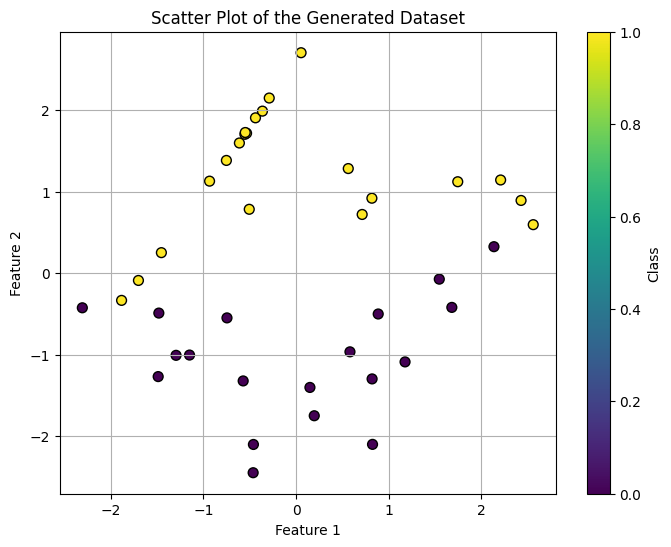

In [ ]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('Scatter Plot of the Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

**Transpilation** is the process of converting the quantum circuit from a high-level abstraction to one that is ready to run on a real quantum computer, taking into account constraints of the hardware.

The Qiskit Sampler primitive is a tool that calculates quasi-probability distributions of bitstrings from quantum circuits


The main idea behind quantum kernel ML is to leverage quantum feature maps to perform the kernel trick. In this case, the quantum kernel is created by mapping a classical feature vector to a Hilbert space using a quantum feature map.

(32, 2)
2


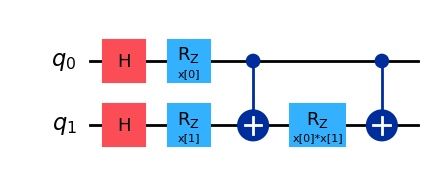

'\n# Use ZZFeatureMap which is suitable for encoding classical data\n# Can experiment here with different feature maps like ZFeatureMap\n# Increasing the number reps increases validation scores\nfeature_map = ZFeatureMap(feature_dimension=X_train.shape[1], reps=1)\n\n# Define the Quantum Kernel\nsampler = StatevectorSampler()\nfidelity = ComputeUncompute(sampler=sampler)\nbinary_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)\n'

In [ ]:
# Defining the quantum kernel
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZFeatureMap
# from qiskit.circuit.library import ZFeatureMap # Keep ZFeatureMap for potential future use
# from qiskit.circuit.library import EfficientSU2 # EfficientSU2 is typically used as a variational form, not a direct feature map for FidelityQuantumKernel

from qiskit.circuit.library import ZZFeatureMap # Use ZZFeatureMap for encoding classical data

# Most quantum feature maps assume input features are scaled to [0, 2*pi]
# because their encoding is via rotations

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_scaled = scaler.fit_transform(X)

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_train.shape[1])
# Custom Quantum Feature Map

from qiskit.circuit import QuantumCircuit, ParameterVector
def custom_feature_map(num_features):
  params = ParameterVector('x', num_features)
  qc = QuantumCircuit(num_features)

  # # Encode each feature with an RZ gate and a Hadamard to create superposition
  for idx in range(num_features):
        qc.h(idx)
        qc.rz(params[idx], idx)

  # Add feature interaction/entanglement
  qc.cx(0, 1)
  qc.rz(params[0] * params[1], 1)
  qc.cx(0, 1)

  return qc, params

qc, params = custom_feature_map(X_train.shape[1])
display(qc.draw('mpl'))

'''
# Use ZZFeatureMap which is suitable for encoding classical data
# Can experiment here with different feature maps like ZFeatureMap
# Increasing the number reps increases validation scores
feature_map = ZFeatureMap(feature_dimension=X_train.shape[1], reps=1)

# Define the Quantum Kernel
sampler = StatevectorSampler()
fidelity = ComputeUncompute(sampler=sampler)
binary_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)
'''

In [ ]:
custom_circuit, params = custom_feature_map(X_train.shape[1])
sampler = StatevectorSampler()
fidelity = ComputeUncompute(sampler=sampler)
binary_kernel = FidelityQuantumKernel(feature_map=custom_circuit, fidelity=fidelity)

The quaantum kernel can now be plugg into classical kernel methods, such as the SVC algorithm from scikit-learn. This algorithm allowws us to define a custom kernel in two ways:
1. By providing the kernel as a callable function
2. By precomputing the kernel matrix

In [ ]:
# Option 2: Precompute training and testing kernel matrixes before passeing them
# to the scikit-learn SVC algorithm

binary_matrix_train = binary_kernel.evaluate(x_vec = X_train)
binary_matrix_test = binary_kernel.evaluate(x_vec = X_test, y_vec=X_train)

In [ ]:
binary_kernel_svc = SVC(kernel='precomputed')
binary_kernel_svc.fit(binary_matrix_train, y_train)

kernel_score_precomputed = binary_kernel_svc.score(binary_matrix_test, y_test)

print(f"Validation score: {kernel_score_precomputed}")

Validation score: 0.875


In [ ]:
# We define the SVC modeland directly pass the evaluate the quantum kernel as a callable.
# Option 1

kernel_svc = SVC(kernel=binary_kernel.evaluate)
kernel_svc.fit(X_train, y_train)

kernel_score_callable_function = kernel_svc.score(X_test, y_test)
print(f"Validation score: {kernel_score_callable_function}")

Validation score: 0.875


We are trying to maximize how helpful the kernel is in finding the similiarty/ overlap between these feature sets. We are varying the number of reps and changes ZZFeatureMap --> ZFeatureMap.

**Experimenting with the number of repititions and feature_map used**

Reps: 1, Validation Score: 0.75
Reps: 2, Validation Score: 0.25
Reps: 3, Validation Score: 0.25
Reps: 4, Validation Score: 0.375


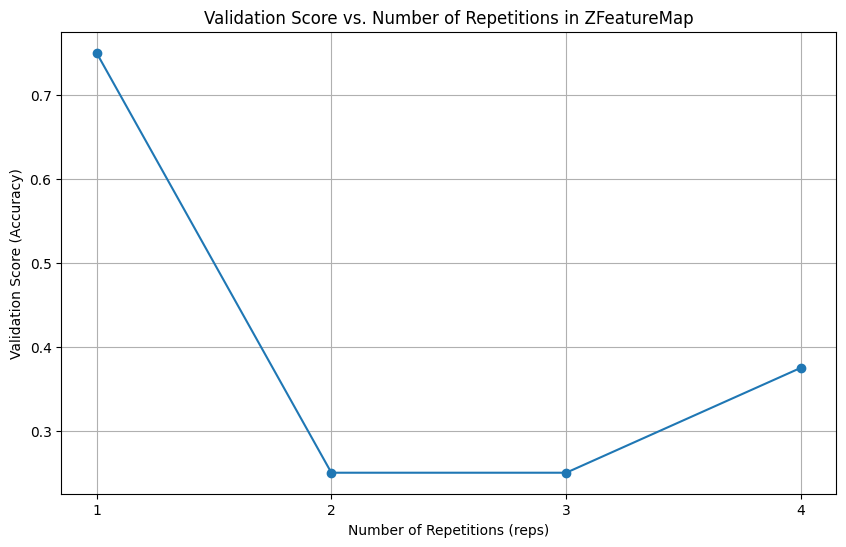

In [ ]:

# Let's collect the validation scores for different numbers of repetitions
reps_values = range(1, 5)  # Test reps from 1 to 10
validation_scores = []

for reps in reps_values:
    feature_map = ZFeatureMap(feature_dimension=X_train.shape[1], reps=reps)
    sampler = Sampler()
    fidelity = ComputeUncompute(sampler=sampler)
    binary_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

    # Using the precomputed kernel approach as it's generally more efficient for multiple evaluations
    binary_matrix_train = binary_kernel.evaluate(x_vec = X_train)
    binary_matrix_test = binary_kernel.evaluate(x_vec = X_test, y_vec=X_train)

    binary_kernel_svc = SVC(kernel='precomputed')
    binary_kernel_svc.fit(binary_matrix_train, y_train)

    score = binary_kernel_svc.score(binary_matrix_test, y_test)
    validation_scores.append(score)
    print(f"Reps: {reps}, Validation Score: {score}")

# Visualize the validation scores vs number of reps
plt.figure(figsize=(10, 6))
plt.plot(reps_values, validation_scores, marker='o', linestyle='-')
plt.title('Validation Score vs. Number of Repetitions in ZFeatureMap')
plt.xlabel('Number of Repetitions (reps)')
plt.ylabel('Validation Score (Accuracy)')
plt.grid(True)
plt.xticks(reps_values)
plt.show()


Visualizing the Kernels

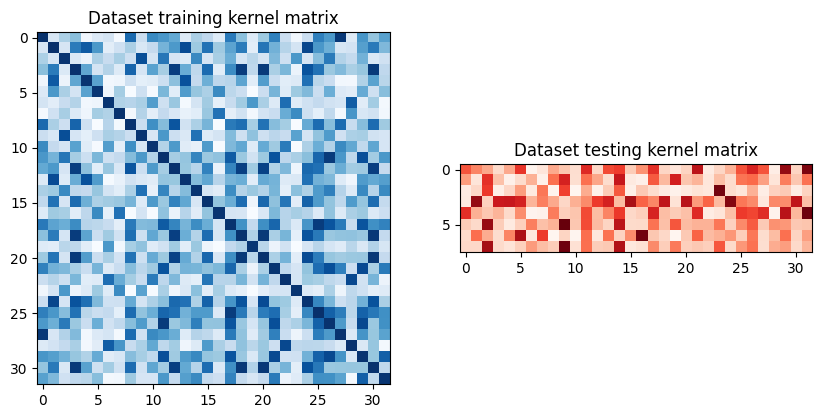

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(binary_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Dataset training kernel matrix")

axs[1].imshow(np.asmatrix(binary_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Dataset testing kernel matrix")

plt.show()

Visualizing the Decision Boundary

KD-Tree Classifier Accuracy (k=7): 0.875


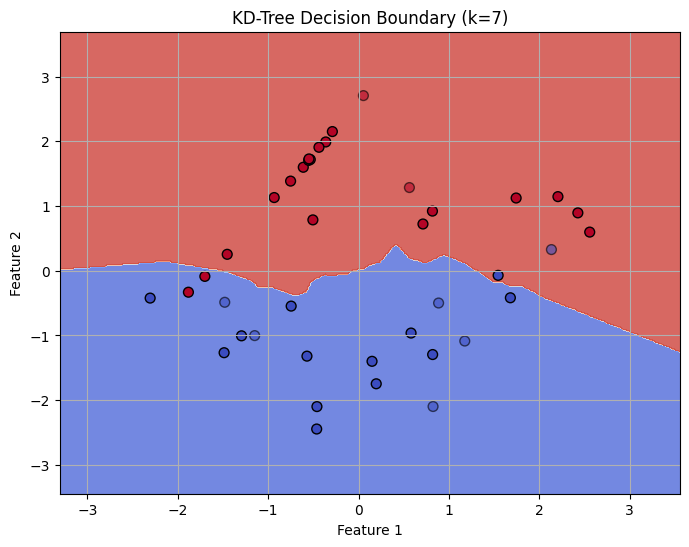

In [ ]:
# Classical KD-Tree Implementation

# Create a KD-Tree classifier
# We'll use k=5 for simplicity, you can experiment with different k values
k = 7
kd_tree_classifier = KDTree(X_train)

# To perform classification with KDTree, we can find the k nearest neighbors
# and then use a simple majority vote
def classify_with_kdtree(X_test, X_train, y_train, k=1):
    kdt = KDTree(X_train)
    distances, indices = kdt.query(X_test, k=k)
    predictions = []
    for i in range(len(X_test)):
        # Get the labels of the k nearest neighbors
        neighbor_labels = [y_train[j] for j in indices[i]]
        # Perform majority vote
        most_common = max(set(neighbor_labels), key=neighbor_labels.count)
        predictions.append(most_common)
    return np.array(predictions)

# Get predictions on the test set
y_pred_kdtree = classify_with_kdtree(X_test, X_train, y_train, k)

# Evaluate the accuracy
accuracy_kdtree = accuracy_score(y_test, y_pred_kdtree)
print(f"KD-Tree Classifier Accuracy (k={k}): {accuracy_kdtree}")

# Create a meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# You can also visualize the decision boundary for the KD-Tree (similar to the SVC visualization)
# This requires predicting on the meshgrid
Z_kdtree = classify_with_kdtree(np.c_[xx.ravel(), yy.ravel()], X_train, y_train, k=k)
Z_kdtree = Z_kdtree.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_kdtree, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
# Plot also the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=50, alpha=0.6)

plt.title(f'KD-Tree Decision Boundary (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Rerunning the code above with varying values of k indicates that odd and medium k values result in a smoother, less visually complex boundary, with a lower likelihood of overfitting and a higher real test accuracy.

Also it is observable that when the training set is smaller, the KD tree performs better than the quantum kernel --> SVC method (i.e., train split = 0.3 vs split = 0.2)

What is beneficial about the code above is that is allows us to vary k (or the number of nearest neighbors queried by the kd-tree), and we can systematically examine the trade off between this and the accuracy

K-Means Clustering Accuracy: 0.75


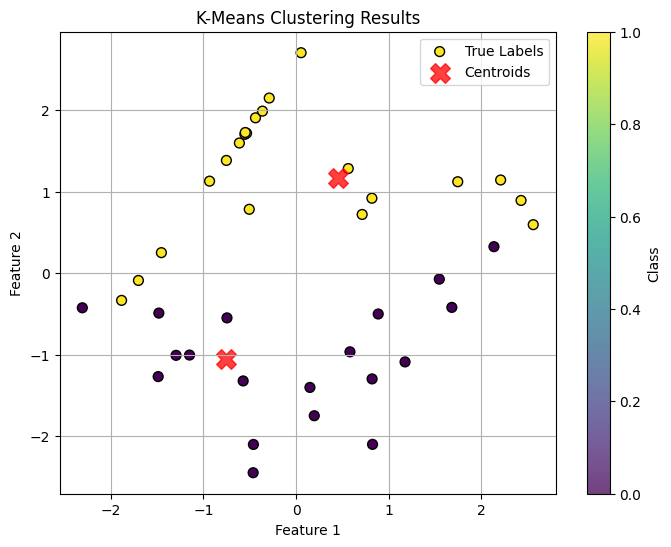

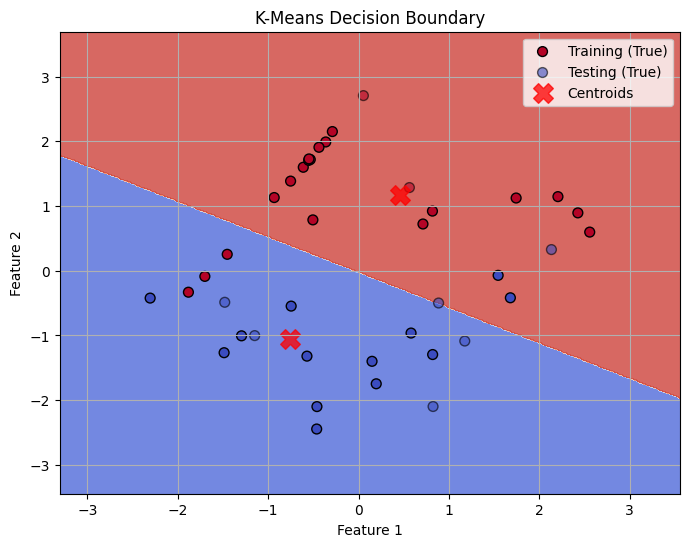

In [ ]:
# Implement K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Assuming 2 classes as in the original data
kmeans.fit(X_train)

# Get predictions on the test set
y_pred_kmeans = kmeans.predict(X_test)

# Evaluate the accuracy of the K-Means clustering relative to the true labels
# Since K-Means is an unsupervised method, the cluster labels might not match the true labels
# We need to map the cluster labels to the true labels
# A simple way is to assign the most frequent true label in each cluster to that cluster
from scipy.stats import mode

labels = np.zeros_like(y_pred_kmeans)
for i in range(2): # Assuming 2 clusters
    mask = (y_pred_kmeans == i)
    labels[mask] = mode(y_test[mask], keepdims=True)[0]

accuracy_kmeans = accuracy_score(y_test, labels)
print(f"K-Means Clustering Accuracy: {accuracy_kmeans}")

# Visualize the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k', s=50, label='True Labels')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Centroids', marker='X')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the K-Means decision boundary (based on predicted clusters)
# Create a meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster for each point in the meshgrid
Z_kmeans = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z_kmeans = Z_kmeans.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_kmeans, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points colored by their true labels
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=50, label='Training (True)')
# Plot also the testing points colored by their true labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=50, alpha=0.6, label='Testing (True)')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, label='Centroids', marker='X')

plt.title('K-Means Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()

For the k-means clustering example above, I believe that n_clusters=2 makes most sense in the way the data was created, however increasing the number of clusters (even just to 3) does improve the accuracy.

**Part Ib - Running Same Workflow but With the Ad_hoc dataset**

In [ ]:
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 12345

In [ ]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

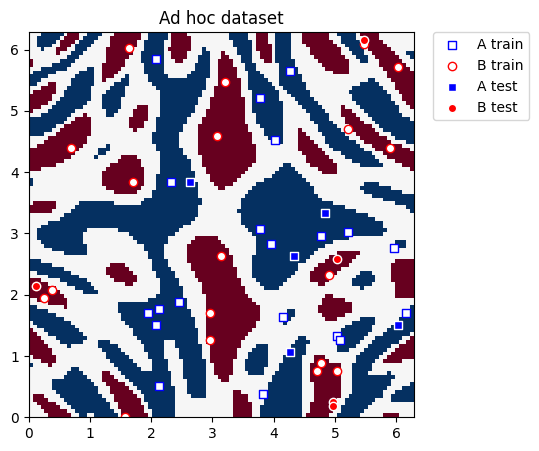

In [ ]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

In [ ]:
from sklearn.svm import SVC

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)

adhoc_svc.fit(train_features, train_labels)

adhoc_score_callable_function = adhoc_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 1.0


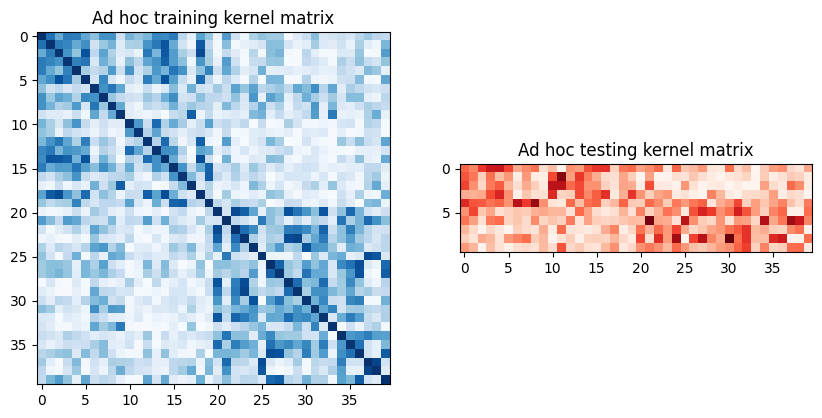

In [ ]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [ ]:
adhoc_svc = SVC(kernel="precomputed")

adhoc_svc.fit(adhoc_matrix_train, train_labels)

adhoc_score_precomputed_kernel = adhoc_svc.score(adhoc_matrix_test, test_labels)

print(f"Precomputed kernel classification test score: {adhoc_score_precomputed_kernel}")

Precomputed kernel classification test score: 1.0


k=1: Validation accuracy=1.0000
k=2: Validation accuracy=1.0000
k=3: Validation accuracy=0.8571
k=4: Validation accuracy=0.8571
k=5: Validation accuracy=0.8571
k=6: Validation accuracy=0.8571
k=7: Validation accuracy=0.8571
k=8: Validation accuracy=0.8571
k=9: Validation accuracy=0.8571
k=10: Validation accuracy=0.8571
k=11: Validation accuracy=0.8571
k=12: Validation accuracy=1.0000
k=13: Validation accuracy=0.8571
k=14: Validation accuracy=0.8571
k=15: Validation accuracy=0.8571
Test accuracy with best k=1: 0.750


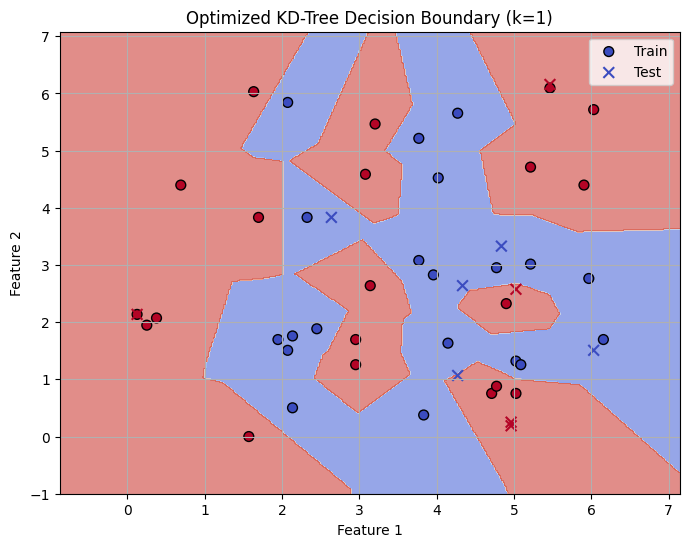

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assume train_features, train_labels, test_features, test_labels exist, and are 2D!
def classify_with_kdtree(X_test, X_train, y_train, k):
    kdt = KDTree(X_train)
    distances, indices = kdt.query(X_test, k=k)
    # Majority vote
    preds = [np.bincount(y_train[ids]).argmax() for ids in indices]
    return np.array(preds)

# Find best k
def best_k_search(train_features, train_labels, val_features, val_labels, k_range=range(1,11)):
    best_k, best_acc = 1, 0.0
    for k in k_range:
        preds = classify_with_kdtree(val_features, train_features, train_labels, k=k)
        acc = accuracy_score(val_labels, preds)
        print(f"k={k}: Validation accuracy={acc:.4f}")
        if acc > best_acc:
            best_acc, best_k = acc, k
    return best_k

# Split off a validation set from your train set:
Xtr, Xval, ytr, yval = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
best_k = best_k_search(Xtr, ytr, Xval, yval, k_range=range(1, 16))

# Retrain on full training data with best k, and evaluate on your test set
y_pred_test = classify_with_kdtree(X_test, X_train, y_train, best_k)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy with best k={best_k}: {test_acc:.3f}")

# Mesh boundary (assuming 2D)
# Create a meshgrid
h = .02
x_min, x_max = train_features[:, 0].min()-1, train_features[:, 0].max()+1
y_min, y_max = train_features[:, 1].min()-1, train_features[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = classify_with_kdtree(mesh_points, train_features, train_labels, best_k).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k', s=50, label='Train')
plt.scatter(test_features[:, 0], test_features[:, 1], c=test_labels, cmap=plt.cm.coolwarm, marker='x', s=60, label='Test')
plt.title(f'Optimized KD-Tree Decision Boundary (k={best_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()

k=2, silhouette score=0.3730
k=3, silhouette score=0.4543
k=4, silhouette score=0.4290
k=5, silhouette score=0.4136
k=6, silhouette score=0.3831
k=7, silhouette score=0.3554

Optimal k found by silhouette score: 3
Approximate clustering accuracy after matching: 0.540


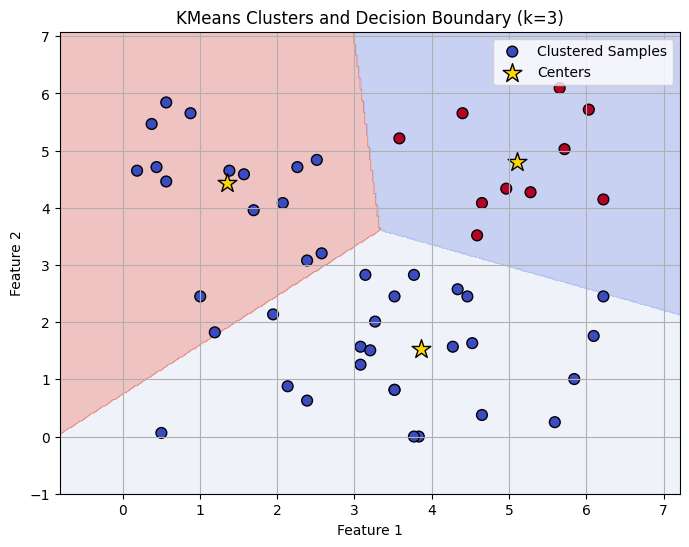

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from qiskit_machine_learning.datasets import ad_hoc_data
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Load ad_hoc dataset (2D)
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

# Step 1: Find optimal number of clusters using only training data
k_range = range(2, 8)
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(train_features)
    score = silhouette_score(train_features, cluster_labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score:.4f}")

best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal k found by silhouette score: {best_k}")

# Step 2: Fit KMeans with best k on training data
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(train_features)

# Predict clusters for both train and test data
train_cluster_labels = kmeans.predict(train_features)
test_cluster_labels = kmeans.predict(test_features)
all_features = np.vstack([train_features, test_features])
all_cluster_labels = np.hstack([train_cluster_labels, test_cluster_labels])
all_true_labels = np.hstack([train_labels, test_labels])
centers = kmeans.cluster_centers_

# Step 4: Match clusters to true labels and compute accuracy
def match_clusters_to_labels(cluster_labels, true_labels):
    new_labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = (cluster_labels == cluster)
        true_label_mode = mode(true_labels[mask], keepdims=False).mode
        new_labels[mask] = true_label_mode
    return new_labels

predicted_classes = match_clusters_to_labels(all_cluster_labels, all_true_labels)
acc = accuracy_score(all_true_labels, predicted_classes)
print(f"Approximate clustering accuracy after matching: {acc:.3f}")


# Step 3: Plot decision boundary
h = 0.02
x_min, x_max = all_features[:, 0].min() - 1, all_features[:, 0].max() + 1
y_min, y_max = all_features[:, 1].min() - 1, all_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(mesh_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(all_features[:, 0], all_features[:, 1], c=predicted_classes, cmap=plt.cm.coolwarm, edgecolor='k', s=60, label='Clustered Samples')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='gold', s=200, edgecolor='k', label='Centers')
plt.title(f"KMeans Clusters and Decision Boundary (k={best_k})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


K-Means Clustering Accuracy on Test Set (mapped to true labels): 0.900


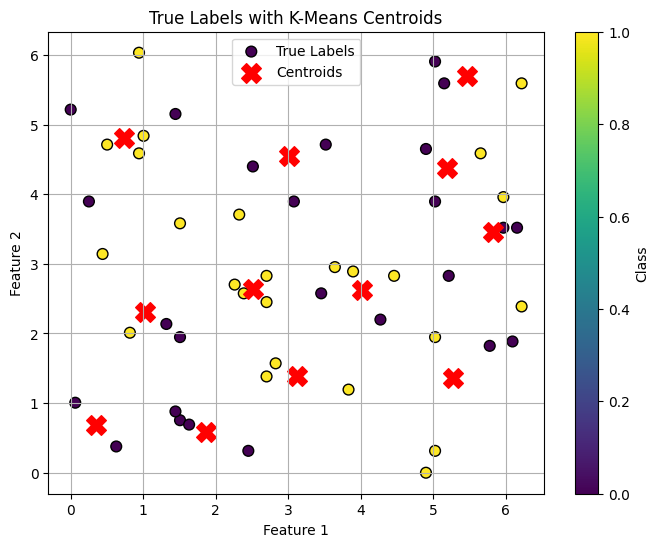

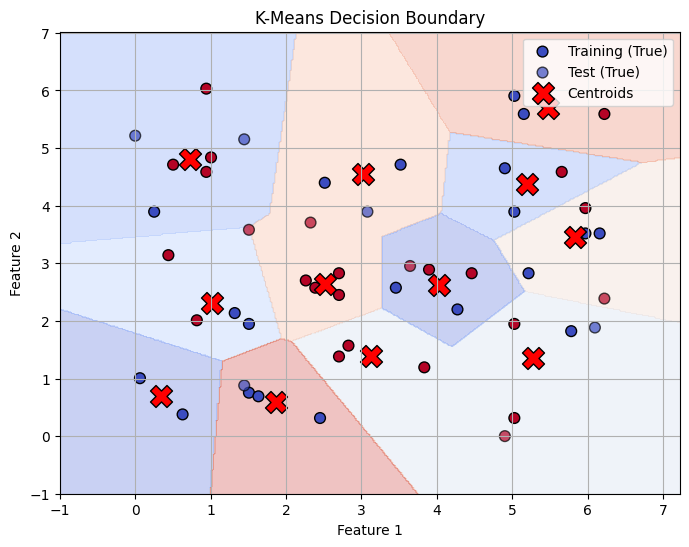

In [ ]:
# Correct KMeans Visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from qiskit_machine_learning.datasets import ad_hoc_data

# Load the ad_hoc dataset (2D)
X_train, y_train, X_test, y_test, _ = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=2,  # 2D features
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

# Fit K-Means on the training data (unsupervised)
# Using n_clusters=12 as in the original code, but note this might not be optimal
# based on silhouette score analysis in the previous cell.
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
kmeans.fit(X_train)

# Predict clusters on the test set
y_pred_clusters = kmeans.predict(X_test)

# Map predicted cluster labels to true labels using majority vote
# Iterate through all clusters found by KMeans (kmeans.n_clusters)
y_pred_mapped = np.zeros_like(y_pred_clusters)
for cluster in range(kmeans.n_clusters): # Corrected range to cover all clusters
    mask = (y_pred_clusters == cluster)
    if np.any(mask):
        # Use mode to find the most frequent true label for points in this cluster
        # keepdims=True was causing issues with older scipy versions, using False
        most_common_label = mode(y_test[mask], keepdims=False)[0]
        y_pred_mapped[mask] = most_common_label

# Evaluate accuracy on the test set
acc = accuracy_score(y_test, y_pred_mapped)
print(f"K-Means Clustering Accuracy on Test Set (mapped to true labels): {acc:.3f}")

# Plot: K-Means Clusters vs True Labels
X_all = np.vstack([X_train, X_test])
y_all = np.hstack([y_train, y_test])
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_all[:, 0], X_all[:, 1], c=y_all, cmap='viridis', edgecolor='k', s=60, label='True Labels')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('True Labels with K-Means Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.colorbar(label='Class')
plt.show()

# Plot: K-Means Decision Boundaries with Test/Train Overlay
h = 0.02
x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(mesh_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=60, label='Training (True)')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', s=60, alpha=0.7, label='Test (True)')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=250, edgecolors='k', label='Centroids')
plt.title('K-Means Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Part 1C - Performing the experiment workflow with noise models and PCA in the case there are more than 2 features.

In [ ]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

#Noise Model
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit_aer import AerSimulator

#KD-Tree model + Performance Metrics
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import time
import random

from qiskit.circuit import QuantumCircuit
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.primitives import StatevectorSampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from sklearn.svm import SVC

from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.circuit.library import ZZFeatureMap


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

prob_1q: represents the probability of a depolarizing error occuring after a single-qubit gate.

prob_2q: This represents the probability of depolarizing error occuring after a two-qubit gate (like a CNOT). Two-qubit gates are generally more prone to errors than single-qubit gates.

In [ ]:
# Build a depolarizing noise model for AerSimulator
def build_depolarizing_noise_model(prob_1q=0.01, prob_2q=0.05):
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(depolarizing_error(prob_1q, 1), ['u1', 'u2', 'u3', 'sx', 'x'])
    noise_model.add_all_qubit_quantum_error(depolarizing_error(prob_2q, 2), ['cx'])
    return noise_model

Next, we are going to create our dataset, ensuring our robustness checks of easily clusterable vs difficult to cluster.

When each class is composed of a single cluster, this tends to make the classes more separable.
Flip_y=0.0 means no labels are randomly flipped/there is not label noise.

Class_sep controls the separation between the classes. A value of 2.0, for example, indicates a large separation, making it easy to distinguish between classes.


By using these two functions, we aim to systematicaly test the performance and robustness of the quantum kernel SVM and KD-Tree classifiers on datasets with varying complexity.

In [ ]:
def make_easy_data(n_samples, n_features):
    # Well separated classes, no label noise
    X, y = make_classification(
        n_samples=n_samples, n_features=n_features, n_informative=n_features,
        n_redundant=0, n_clusters_per_class=1, flip_y=0.0, class_sep=2.0, random_state=42
    )
    return X, y

def make_hard_data(n_samples, n_features):
    # Overlapping classes, label noise present
    X, y = make_classification(
        n_samples=n_samples, n_features=n_features, n_informative=n_features,
        n_redundant=0, n_clusters_per_class=2, flip_y=0.2, class_sep=0.5, random_state=42
    )
    return X, y

In [ ]:
# We can further test dataset complexity by adding noise to feature data and flip labels randomly
# More fine-tuned control on the noise, applicable to any dataset, not just those generated by make_classification.

def add_data_noise(X, y, noise_std=0.2, label_flip_prob=0.10):
    np.random.seed(0)
    # Add Gaussian noise
    noisy_X = X + np.random.normal(0, noise_std, size=X.shape)
    # label noise
    mask = np.random.rand(len(y)) < label_flip_prob
    noisy_y = y.copy()
    # Flip the labels selected by the mask - bitstring manipulation
    noisy_y[mask] = 1 - noisy_y[mask]
    return noisy_X, noisy_y

In [ ]:
pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.


In [ ]:
pip install -U qiskit qiskit-aer qiskit-machine-learning qiskit-algorithms

  Using cached qiskit-2.1.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)


In [ ]:
# Custom Feature Map
from qiskit.circuit import QuantumCircuit, ParameterVector

def custom_feature_map(num_features):

    params = ParameterVector('x', num_features)
    qc = QuantumCircuit(num_features)

    # Apply Hadamard gates at the beginning
    qc.h(range(num_features))

    # First layer of encoding and entanglement
    for i in range(num_features):
        qc.rz(params[i], i)

    # Linear entanglement
    for i in range(num_features - 1):
        qc.cx(i, i + 1)

    return qc, params

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from sklearn.model_selection import train_test_split
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute

# Primary Benchmakring Comparison Method
def benchmark(X_train, X_test, y_train, y_test, num_features=0, noise_model=None, pca_dim=None):
  results = {}

  # Applying PCA, if specified, which will aid the KD-tree Primarily (allows use to compare KD-trees with and without PCA)
  if pca_dim is not None:
    pca = PCA(n_components=pca_dim)
    X_train_pca = pca.fit_transform(X_train)
    # Applies the already transformation to the new data.
    X_test_pca = pca.transform(X_test)
  else:
    X_train_pca, X_test_pca = X_train, X_test

  # Create the Quantum Kernel Instance
  # We should experiment here with the type of feature map
  custom_circuit, params = custom_feature_map(num_features=X_train_pca.shape[1])
  feature_map = ZZFeatureMap(feature_dimension=X_train_pca.shape[1], reps=2)

  # Initialize Sampler with noise model if provided
  if noise_model:
    sampler = Sampler()
    #BackendSampler(backend=AerSimulator(noise_model=noise_model))
  else:
    sampler = Sampler()

  fidelity = ComputeUncompute(sampler=sampler)
  quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=custom_circuit)

  # Define the SVM using this quantum kernel callable for sklearn SVC
  qsvm = SVC(kernel=quantum_kernel.evaluate)
  qsvm.fit(X_train_pca, y_train)
  y_pred_qsvm = qsvm.predict(X_test_pca)
  results['quantum_svm_acc'] = accuracy_score(y_test, y_pred_qsvm)

  # KD-tree nearest neighbor
  kd_tree = KDTree(X_train_pca)
  dist, ind = kd_tree.query(X_test_pca, k=1)
  y_pred_kd = y_train[ind.flatten()]
  # Store final score in dictionary (as with the qsvm)
  results['kd_tree_acc'] = accuracy_score(y_test, y_pred_kd)

  return results

A KD-Tree is a data structure that efficiently organizes points in a multi-dimensional space, making nearest neighbor searches much faster than a brute-force approach, especially for high-dimensional data.Our y_pred array at the end of this contains the predicted class label for each point in the test set based on its k (in this case single) nearest neighbor in the training set.

Running the experiment (with the ability to customize our datasets)

In [ ]:
n_samples = 120
n_features = 4

#Generate Datasets
datasets = {
    "Easy": make_easy_data,
    "Difficult": make_hard_data
}

# Run the workflow for each of these dataset
for label, data_func in datasets.items():
    print(f"\n===== {label} Dataset =====")
    X, y = data_func(n_samples, n_features)
    #Train/Test Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Baseline: Clean/ Noise-free data
    res = benchmark(X_train, X_test, y_train, y_test)
    print(f"Quantum Kernel SVM (clean kernel & data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data): {res['kd_tree_acc']:.3f}")

    # Apply noise to the dataset
    noisy_X_train, noisy_y_train = add_data_noise(X_train, y_train, noise_std=0.3, label_flip_prob=0.15)
    noisy_X_test, noisy_y_test = add_data_noise(X_test, y_test, noise_std=0.3, label_flip_prob=0.15)
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test)

    print(f"Quantum SVM (clean kernel, noisy data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data): {res['kd_tree_acc']:.3f}")

    # Quantum Kernel With Noise Model (Depolarizing Noise)
    # noise_model = build_depolarizing_noise_model(prob_1q=0.03, prob_2q=0.10)
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data): {res['quantum_svm_acc']:.3f}")

    # Let's also examine, if PCA will assist the KD-tree (as it is hypothesize to perfomr better with few-moderate dimension (or features in this case))
    res = benchmark(X_train, X_test, y_train, y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel & data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data + PCA): {res['kd_tree_acc']:.3f}")

    # Noisy kernel + PCA
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model, pca_dim=2)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data + PCA): {res['quantum_svm_acc']:.3f}")

    # Noise data, clean kernel + PCA
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel, noisy data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data + PCA): {res['kd_tree_acc']:.3f}")


===== Easy Dataset =====


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data): 1.000
KD-Tree (clean data): 1.000


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum SVM (clean kernel, noisy data): 0.889
KD-Tree (noisy data): 0.806


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data + PCA): 0.806
KD-Tree (clean data + PCA): 1.000


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel, noisy data + PCA): 0.667
KD-Tree (noisy data + PCA): 0.861

===== Difficult Dataset =====


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data): 0.639
KD-Tree (clean data): 0.639


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum SVM (clean kernel, noisy data): 0.611
KD-Tree (noisy data): 0.667


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data + PCA): 0.583
KD-Tree (clean data + PCA): 0.556


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel, noisy data + PCA): 0.694
KD-Tree (noisy data + PCA): 0.528


Running this same procedure again to see if there is a consistency in when KD-trees surpasses the Quantum Kernel with regards to the complexity of the dataset.


**From before we can observe the following:**

Easily Classifiable
1. PCA ensures a much higher for the KD-tree only
2. Noisy data + PCA results in a near same accuracy as the quantum kernel SVM with noisy data an a clean kernel

Difficult to Classify
1. KD-Tree performs better on noisy data than quantum kernel SVM
2. PCA is not beneficial and does not improve its prediciton accuracy


In [ ]:
def make_easy_data(n_samples, n_features):
    # Well separated classes, no label noise
    X, y = make_classification(
        n_samples=n_samples, n_features=n_features, n_informative=n_features,
        n_redundant=0, n_clusters_per_class=1, flip_y=0.0, class_sep=2.0, random_state=50
    )
    return X, y

def make_hard_data(n_samples, n_features):
    # Overlapping classes, label noise present
    X, y = make_classification(
        n_samples=n_samples, n_features=n_features, n_informative=n_features,
        n_redundant=0, n_clusters_per_class=2, flip_y=0.2, class_sep=0.5, random_state=50
    )
    return X, y

In [ ]:
n_samples = 120
n_features = 4

#Generate Datasets
datasets = {
    "Easy": make_easy_data,
    "Difficult": make_hard_data
}

# Run the workflow for each of these dataset
for label, data_func in datasets.items():
    print(f"\n===== {label} Dataset =====")
    X, y = data_func(n_samples, n_features)
    #Train/Test Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Baseline: Clean/ Noise-free data
    res = benchmark(X_train, X_test, y_train, y_test)
    print(f"Quantum Kernel SVM (clean kernel & data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data): {res['kd_tree_acc']:.3f}")

    # Apply noise to the dataset
    noisy_X_train, noisy_y_train = add_data_noise(X_train, y_train, noise_std=0.3, label_flip_prob=0.15)
    noisy_X_test, noisy_y_test = add_data_noise(X_test, y_test, noise_std=0.3, label_flip_prob=0.15)
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test)

    print(f"Quantum SVM (clean kernel, noisy data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data): {res['kd_tree_acc']:.3f}")

    # Quantum Kernel With Noise Model (Depolarizing Noise)
    # noise_model = build_depolarizing_noise_model(prob_1q=0.03, prob_2q=0.10)
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data): {res['quantum_svm_acc']:.3f}")

    # Let's also examine, if PCA will assist the KD-tree (as it is hypothesize to perfomr better with few-moderate dimension (or features in this case))
    res = benchmark(X_train, X_test, y_train, y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel & data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data + PCA): {res['kd_tree_acc']:.3f}")

    # Noisy kernel + PCA
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model, pca_dim=2)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data + PCA): {res['quantum_svm_acc']:.3f}")

    # Noise data, clean kernel + PCA
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel, noisy data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data + PCA): {res['kd_tree_acc']:.3f}")


===== Easy Dataset =====


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data): 0.889
KD-Tree (clean data): 0.972


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum SVM (clean kernel, noisy data): 0.889
KD-Tree (noisy data): 0.833


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data + PCA): 0.667
KD-Tree (clean data + PCA): 0.889


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel, noisy data + PCA): 0.639
KD-Tree (noisy data + PCA): 0.806

===== Difficult Dataset =====


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data): 0.500
KD-Tree (clean data): 0.500


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum SVM (clean kernel, noisy data): 0.472
KD-Tree (noisy data): 0.528


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data + PCA): 0.611
KD-Tree (clean data + PCA): 0.500


/tmp/ipython-input-45-490587494.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel, noisy data + PCA): 0.611
KD-Tree (noisy data + PCA): 0.722


**PCA data used only for the KD-Tree**

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from sklearn.model_selection import train_test_split
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute

# Primary Benchmakring Comparison Method
def benchmark(X_train, X_test, y_train, y_test, num_features=0, noise_model=None, pca_dim=None):
  results = {}

  # Applying PCA, if specified, which will aid the KD-tree Primarily (allows use to compare KD-trees with and without PCA)
  if pca_dim is not None:
    pca = PCA(n_components=pca_dim)
    X_train_pca = pca.fit_transform(X_train)
    # Applies the already transformation to the new data.
    X_test_pca = pca.transform(X_test)
  else:
    X_train_pca, X_test_pca = X_train, X_test

  # Create the Quantum Kernel Instance
  # We should experiment here with the type of feature map
  custom_circuit, params = custom_feature_map(num_features=X_train.shape[1])
  # feature_map = ZZFeatureMap(feature_dimension=X_train_pca.shape[1], reps=2)

  # Initialize Sampler with noise model if provided
  if noise_model:
    sampler = Sampler()
    #BackendSampler(backend=AerSimulator(noise_model=noise_model))
  else:
    sampler = Sampler()

  fidelity = ComputeUncompute(sampler=sampler)
  quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=custom_circuit)

  # Define the SVM using this quantum kernel callable for sklearn SVC
  qsvm = SVC(kernel=quantum_kernel.evaluate)
  qsvm.fit(X_train, y_train)
  y_pred_qsvm = qsvm.predict(X_test)
  results['quantum_svm_acc'] = accuracy_score(y_test, y_pred_qsvm)

  # KD-tree nearest neighbor
  kd_tree = KDTree(X_train_pca)
  dist, ind = kd_tree.query(X_test_pca, k=1)
  y_pred_kd = y_train[ind.flatten()]
  # Store final score in dictionary (as with the qsvm)
  results['kd_tree_acc'] = accuracy_score(y_test, y_pred_kd)

  return results

In [ ]:
n_samples = 120
n_features = 4

#Generate Datasets
datasets = {
    "Easy": make_easy_data,
    "Difficult": make_hard_data
}

# Run the workflow for each of these dataset
for label, data_func in datasets.items():
    print(f"\n===== {label} Dataset =====")
    X, y = data_func(n_samples, n_features)
    #Train/Test Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Baseline: Clean/ Noise-free data
    res = benchmark(X_train, X_test, y_train, y_test)
    print(f"Quantum Kernel SVM (clean kernel & data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data): {res['kd_tree_acc']:.3f}")

    # Apply noise to the dataset
    noisy_X_train, noisy_y_train = add_data_noise(X_train, y_train, noise_std=0.3, label_flip_prob=0.15)
    noisy_X_test, noisy_y_test = add_data_noise(X_test, y_test, noise_std=0.3, label_flip_prob=0.15)
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test)

    print(f"Quantum SVM (clean kernel, noisy data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data): {res['kd_tree_acc']:.3f}")

    # Quantum Kernel With Noise Model (Depolarizing Noise)
    # noise_model = build_depolarizing_noise_model(prob_1q=0.03, prob_2q=0.10)
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data): {res['quantum_svm_acc']:.3f}")

    # Let's also examine, if PCA will assist the KD-tree (as it is hypothesize to perfomr better with few-moderate dimension (or features in this case))
    res = benchmark(X_train, X_test, y_train, y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel & data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data + PCA): {res['kd_tree_acc']:.3f}")

    # Noisy kernel + PCA
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model, pca_dim=2)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data + PCA): {res['quantum_svm_acc']:.3f}")

    # Noise data, clean kernel + PCA
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel, noisy data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data + PCA): {res['kd_tree_acc']:.3f}")


===== Easy Dataset =====


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data): 0.889
KD-Tree (clean data): 0.972


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum SVM (clean kernel, noisy data): 0.889
KD-Tree (noisy data): 0.833


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data + PCA): 0.889
KD-Tree (clean data + PCA): 0.889


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel, noisy data + PCA): 0.889
KD-Tree (noisy data + PCA): 0.806

===== Difficult Dataset =====


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data): 0.500
KD-Tree (clean data): 0.500


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum SVM (clean kernel, noisy data): 0.472
KD-Tree (noisy data): 0.528


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel & data + PCA): 0.500
KD-Tree (clean data + PCA): 0.500


/tmp/ipython-input-59-4138967783.py:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum Kernel SVM (clean kernel, noisy data + PCA): 0.472
KD-Tree (noisy data + PCA): 0.722


**Let's see what holds from our observations above**

Easily Classifiable
1. PCA ensures a much higher for the KD-tree only for clean data **✓**
2. Noisy data + PCA results in a near same accuracy as the quantum kernel SVM with noisy data an a clean kernel  **✓**

Difficult to Classify
1. KD-Tree performs better on noisy data than quantum kernel SVM **✓**
2. PCA is not beneficial and does not improve its prediciton accuracy (**Not entirely supported above**) --> Seems to be beneficial for noisy data + difficult to cluster + PCA

Another Check:

We also want to visualize these datasets to ensure that are either well-clusterable or not well-clusterable.

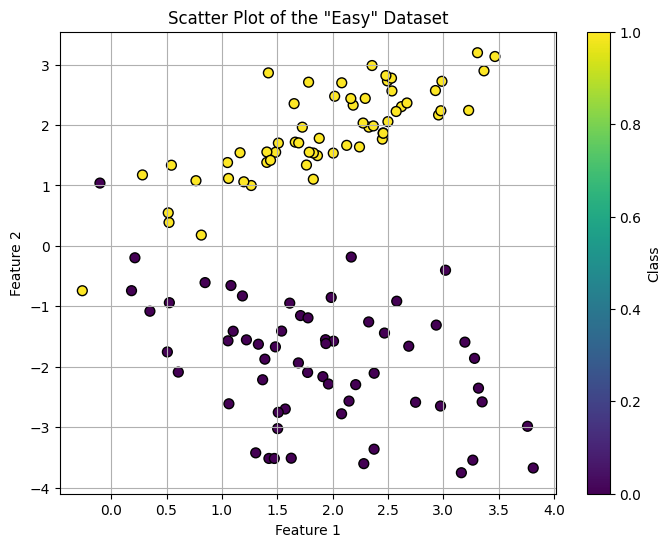

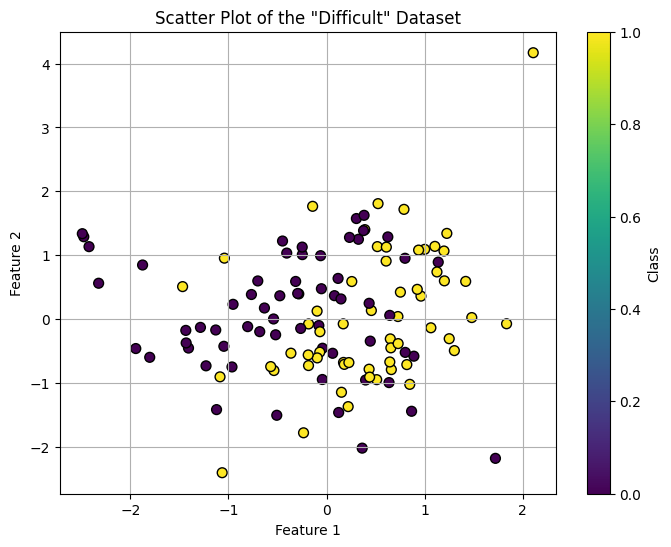

In [ ]:
n_samples = 120
n_features = 2 # Set features to 2 for easy visualization

# Generate Easy Dataset
X_easy, y_easy = make_easy_data(n_samples, n_features)

# Generate Difficult Dataset
X_difficult, y_difficult = make_hard_data(n_samples, n_features)

# Visualize Easy Dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_easy[:, 0], X_easy[:, 1], c=y_easy, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('Scatter Plot of the "Easy" Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# Visualize Difficult Dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_difficult[:, 0], X_difficult[:, 1], c=y_difficult, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('Scatter Plot of the "Difficult" Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

Part 1d - Using KD-Trees as a postprocessing step

Now that we see large potential benefits of KD-trees in terms of computational time and boundary determining capabilities, we can try and augment this as a post-processing step in our new workflow to solve the porblem of ambiguous boundaries.

Using KD trees to classify points that are incorrectly labeled y a quantum kernel SVM - targeting ambiguous boundary problems and aiming to boost classification in these difficult regions.

KD-trees are efficient for local, nonparametric, axis-aligned classification and nearest neighbor search.
Hypothesis: A hybrid workflow- first classify with a quantum kernel SVM, then re-classify SVM mistakes using KD tree locally-can improve accuracy in ambiguous regions while maintaing quantum-enhanced margins elsewhere.

/tmp/ipython-input-48-3224609826.py:21: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


[SVM] Test accuracy: 0.472
[SVM] Misclassified points: 19
[Hybrid SVM + KD-tree] Test accuracy: 0.889


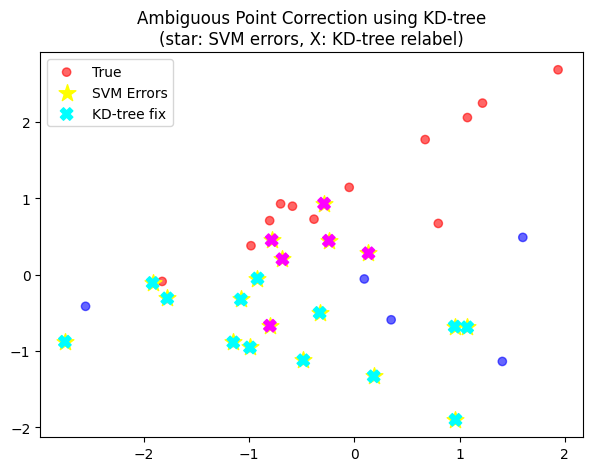

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KDTree
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# -- DATASET: Use high overlap for ambiguous boundaries
X, y = make_classification(
    n_samples=120, n_features=2, n_informative=2, n_redundant=0,
    n_classes=2, flip_y=0.1, class_sep=0.7, random_state=24
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# -- STEP 1: Train Quantum Kernel SVM

feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

svc = SVC(kernel=quantum_kernel.evaluate)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)
print(f'[SVM] Test accuracy: {baseline_acc:.3f}')

# -- STEP 2: Find misclassified ("ambiguous") test points
misclassified_idx = np.where(y_pred != y_test)[0]
print(f'[SVM] Misclassified points: {len(misclassified_idx)}')

# -- STEP 3: Train KD-tree and reclassify SVM errors
kdtree = KDTree(X_train)
ambiguous_points = X_test[misclassified_idx]
# Use k=3 for more robust voting
_, knn_indices = kdtree.query(ambiguous_points, k=3)
# Get majority label from nearest neighbors
knn_labels = y_train[knn_indices]
kdtree_maj_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=knn_labels)

# -- STEP 4: Update predictions with KD-tree for ambiguous points
y_pred_hybrid = y_pred.copy()
y_pred_hybrid[misclassified_idx] = kdtree_maj_vote
hybrid_acc = accuracy_score(y_test, y_pred_hybrid)
print(f'[Hybrid SVM + KD-tree] Test accuracy: {hybrid_acc:.3f}')

# -- STEP 5: Visualize decision (PCA to 2D)
#pca = PCA(n_components=2)
X_test_2d = X_test #pca.fit_transform(X_test)
plt.figure(figsize=(7,5))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap="bwr", alpha=0.6, label="True")
plt.scatter(X_test_2d[misclassified_idx, 0], X_test_2d[misclassified_idx, 1],
            c="yellow", marker="*", s=160, label="SVM Errors")
plt.scatter(X_test_2d[misclassified_idx, 0], X_test_2d[misclassified_idx, 1],
            c=kdtree_maj_vote, cmap="cool", marker="X", s=80, label="KD-tree fix")
plt.legend()
plt.title("Ambiguous Point Correction using KD-tree\n(star: SVM errors, X: KD-tree relabel)")
plt.show()

In [ ]:
print(f'[Hybrid SVM + KD-tree] Test accuracy: {hybrid_acc:.3f}')

# -- Print details of misclassified points --
print("\n--- Details of Misclassified Points ---")
if len(misclassified_idx) > 0:
    print("Original Features | True Label | SVM Predicted | KD-tree Reclassified")
    print("-------------------------------------------------------------------")
    for i, idx in enumerate(misclassified_idx):
        original_features = X_test[idx]
        true_label = y_test[idx]
        svm_predicted = y_pred[idx]
        kdtree_reclassified = kdtree_maj_vote[i]
        print(f"{original_features}   | {true_label}  | {svm_predicted}   | {kdtree_reclassified}")
else:
    print("No misclassified points found by SVM.")

NameError: name 'hybrid_acc' is not defined

Re-running the same experiment as descibred in Part 1d, but using our observation that PCA is generally useful for KD-trees for classifying when there are more features. --> Implemented with 4 Features with only 2 Informtive

**Without PCA**

[SVM] Test accuracy: 0.750
[SVM] Misclassified points: 9
[Hybrid SVM + KD-tree] Test accuracy: 0.861


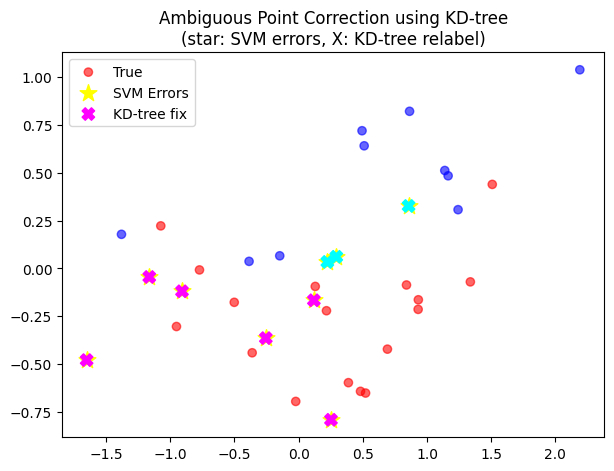

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KDTree
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# -- DATASET: Use high overlap for ambiguous boundaries
X, y = make_classification(
    n_samples=120, n_features=4, n_informative=2, n_redundant=2,
    n_classes=2, flip_y=0.1, class_sep=0.7, random_state=30
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# -- STEP 1: Train Quantum Kernel SVM
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

svc = SVC(kernel=quantum_kernel.evaluate)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)
print(f'[SVM] Test accuracy: {baseline_acc:.3f}')

# -- STEP 2: Find misclassified ("ambiguous") test points
misclassified_idx = np.where(y_pred != y_test)[0]
print(f'[SVM] Misclassified points: {len(misclassified_idx)}')

# -- STEP 3: Train KD-tree and reclassify SVM errors
kdtree = KDTree(X_train)
ambiguous_points = X_test[misclassified_idx]
# Use k=3 for more robust voting
_, knn_indices = kdtree.query(ambiguous_points, k=3)
# Get majority label from nearest neighbors
knn_labels = y_train[knn_indices]
kdtree_maj_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=knn_labels)

# -- STEP 4: Update predictions with KD-tree for ambiguous points
y_pred_hybrid = y_pred.copy()
y_pred_hybrid[misclassified_idx] = kdtree_maj_vote
hybrid_acc = accuracy_score(y_test, y_pred_hybrid)
print(f'[Hybrid SVM + KD-tree] Test accuracy: {hybrid_acc:.3f}')

# -- STEP 5: Visualize decision (PCA to 2D)
#pca = PCA(n_components=2)
X_test_2d = X_test
#pca.fit_transform(X_test)
plt.figure(figsize=(7,5))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap="bwr", alpha=0.6, label="True")
plt.scatter(X_test_2d[misclassified_idx, 0], X_test_2d[misclassified_idx, 1],
            c="yellow", marker="*", s=160, label="SVM Errors")
plt.scatter(X_test_2d[misclassified_idx, 0], X_test_2d[misclassified_idx, 1],
            c=kdtree_maj_vote, cmap="cool", marker="X", s=80, label="KD-tree fix")
plt.legend()
plt.title("Ambiguous Point Correction using KD-tree\n(star: SVM errors, X: KD-tree relabel)")
plt.show()

In [ ]:
print(f'[Hybrid SVM + KD-tree] Test accuracy: {hybrid_acc:.3f}')

# -- Print details of misclassified points --
print("\n--- Details of Misclassified Points ---")
if len(misclassified_idx) > 0:
    print("Original Features | True Label | SVM Predicted | KD-tree Reclassified")
    print("-------------------------------------------------------------------")
    for i, idx in enumerate(misclassified_idx):
        original_features = X_test[idx]
        true_label = y_test[idx]
        svm_predicted = y_pred[idx]
        kdtree_reclassified = kdtree_maj_vote[i]
        print(f"{original_features}   | {true_label}  | {svm_predicted}   | {kdtree_reclassified}")
else:
    print("No misclassified points found by SVM.")

[Hybrid SVM + KD-tree] Test accuracy: 0.861

--- Details of Misclassified Points ---
Original Features | True Label | SVM Predicted | KD-tree Reclassified
-------------------------------------------------------------------
[-1.65048693 -0.47989357 -1.53276025  1.46699583]   | 0  | 1   | 1
[ 0.29371106  0.0605193   0.25459254 -0.19984755]   | 0  | 1   | 0
[-0.90782195 -0.11993982 -0.7378991   0.45257685]   | 0  | 1   | 1
[ 0.22391936  0.03354422  0.18489903 -0.12137417]   | 0  | 1   | 0
[ 0.85667231  0.32616207  0.85185306 -0.95106166]   | 0  | 1   | 0
[ 0.11913941 -0.16696785 -0.03658422  0.39011381]   | 0  | 1   | 1
[-1.16273141 -0.04521327 -0.8659325   0.31295408]   | 0  | 1   | 1
[-0.2551058  -0.36487241 -0.44919308  0.94193524]   | 0  | 1   | 1
[ 0.25222453 -0.79206474 -0.39772923  1.90492084]   | 1  | 0   | 1


**With PCA**

[SVM] Test accuracy (on PCA data): 0.639

[SVM] Number of misclassified points (on PCA data): 13
[Hybrid SVM + KD-tree] Test accuracy (on PCA data): 0.861


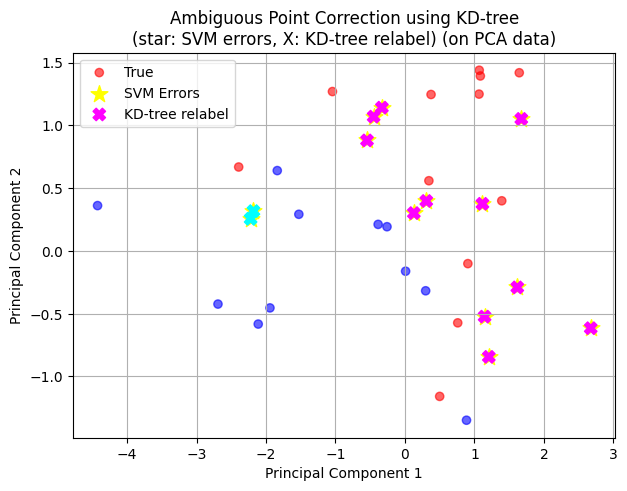

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KDTree
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# -- DATASET: Use high overlap for ambiguous boundaries
X, y = make_classification(
    n_samples=120, n_features=4, n_informative=2, n_redundant=2,
    n_classes=2, flip_y=0.1, class_sep=0.7, random_state=30
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# --- Apply PCA here, before training the SVM ---
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Now, X_train_pca and X_test_pca are the data in the reduced 2D space
# Both the SVM and the KD-Tree will operate on this reduced data.


# -- STEP 1: Train Quantum Kernel SVM

# Use the PCA-reduced data for the feature map
feature_map = ZZFeatureMap(feature_dimension=X_train_pca.shape[1], reps=2)
sampler = Sampler() # Use StatevectorSampler for ideal simulation in this example
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Train SVM on PCA-reduced data
svc = SVC(kernel=quantum_kernel.evaluate)
svc.fit(X_train_pca, y_train)
y_pred = svc.predict(X_test_pca) # Predict on PCA-reduced test data
baseline_acc = accuracy_score(y_test, y_pred)
print(f'[SVM] Test accuracy (on PCA data): {baseline_acc:.3f}')

# -- STEP 2: Find misclassified ("ambiguous") test points
# These misclassifications are now based on the SVM trained on PCA data
misclassified_idx = np.where(y_pred != y_test)[0]
print(f'\n[SVM] Number of misclassified points (on PCA data): {len(misclassified_idx)}')

# -- STEP 3: Train KD-tree and reclassify SVM errors
# KD-Tree is built on the PCA-reduced training data
kdtree = KDTree(X_train_pca)
ambiguous_points = X_test_pca[misclassified_idx] # Use PCA-reduced test points
# Use k=3 for more robust voting
_, knn_indices = kdtree.query(ambiguous_points, k=3)
# Get majority label from nearest neighbors (labels are still from original y_train)
knn_labels = y_train[knn_indices]
kdtree_maj_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=knn_labels)

# -- STEP 4: Update predictions with KD-tree for ambiguous points
y_pred_hybrid = y_pred.copy()
y_pred_hybrid[misclassified_idx] = kdtree_maj_vote
hybrid_acc = accuracy_score(y_test, y_pred_hybrid)
print(f'[Hybrid SVM + KD-tree] Test accuracy (on PCA data): {hybrid_acc:.3f}')

# -- STEP 5: Visualize decision (PCA data is already 2D)
X_test_2d = X_test_pca # Use the PCA-reduced data for visualization
plt.figure(figsize=(7,5))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap="bwr", alpha=0.6, label="True")
plt.scatter(X_test_2d[misclassified_idx, 0], X_test_2d[misclassified_idx, 1],
            c="yellow", marker="*", s=160, label="SVM Errors")
plt.scatter(X_test_2d[misclassified_idx, 0], X_test_2d[misclassified_idx, 1],
            c=kdtree_maj_vote, cmap="cool", marker="X", s=80, label="KD-tree relabel")
plt.legend()
plt.title("Ambiguous Point Correction using KD-tree\n(star: SVM errors, X: KD-tree relabel) (on PCA data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

We observe that performing PCA did not affect the accuracy the is acheivable by applying the kd-trees as a post-processing step.

**Guiding Questions**
How did the quantum kernel SVM perform compared to the KD-Tree?
Did dimensionality reduction (PCA) help, and for which method and dataset types?
Which method was more robust to different types of noise?
What are the trade-offs you observed?
Did the hybrid KD-Tree approach improve performance on ambiguous boundaries?

Next Steps:
- Run the same procedure as in part 1c but with the noise model/noisy kernel
- Optimize code to be able to run the experiments with varying parameters while plotting the accuracy.
- See if any of the previous observations hold as the datasets' complexity changes.

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from sklearn.model_selection import train_test_split
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService

# Primary Benchmakring Comparison Method
def benchmark_with_noise_model(X_train, X_test, y_train, y_test, num_features=0, noise_model=None, pca_dim=None):
  results = {}

  # Applying PCA, if specified, which will aid the KD-tree Primarily (allows use to compare KD-trees with and without PCA)
  if pca_dim is not None:
    pca = PCA(n_components=pca_dim)
    X_train_pca = pca.fit_transform(X_train)
    # Applies the already transformation to the new data.
    X_test_pca = pca.transform(X_test)
  else:
    X_train_pca, X_test_pca = X_train, X_test

  # Create the Quantum Kernel Instance
  # We should experiment here with the type of feature map
  custom_circuit, params = custom_feature_map(num_features=X_train.shape[1])
  # feature_map = ZZFeatureMap(feature_dimension=X_train_pca.shape[1], reps=2)

  # Initialize Sampler with noise model if provided
  if noise_model:
    service = QiskitRuntimeService()
    backend = service.get_backend("ibmq_qasm_simulator")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
    isa_qc = pm.run(custom_circuit)
    sampler = Sampler(backend=backend, noise_model=noise_model)
  else:
    sampler = Sampler()

  fidelity = ComputeUncompute(sampler=sampler)
  quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=custom_circuit)

  # Define the SVM using this quantum kernel callable for sklearn SVC
  qsvm = SVC(kernel=quantum_kernel.evaluate)
  qsvm.fit(X_train, y_train)
  y_pred_qsvm = qsvm.predict(X_test)
  results['quantum_svm_acc'] = accuracy_score(y_test, y_pred_qsvm)

  # KD-tree nearest neighbor
  kd_tree = KDTree(X_train_pca)
  dist, ind = kd_tree.query(X_test_pca, k=1)
  y_pred_kd = y_train[ind.flatten()]
  # Store final score in dictionary (as with the qsvm)
  results['kd_tree_acc'] = accuracy_score(y_test, y_pred_kd)

  return results

In [ ]:
n_samples = 120
n_features = 4

#Generate Datasets
datasets = {
    "Easy": make_easy_data,
    "Difficult": make_hard_data
}

# Run the workflow for each of these dataset
for label, data_func in datasets.items():
    print(f"\n===== {label} Dataset =====")
    X, y = data_func(n_samples, n_features)
    #Train/Test Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Baseline: Clean/ Noise-free data
    res = benchmark(X_train, X_test, y_train, y_test)
    print(f"Quantum Kernel SVM (clean kernel & data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data): {res['kd_tree_acc']:.3f}")

    # Apply noise to the dataset
    noisy_X_train, noisy_y_train = add_data_noise(X_train, y_train, noise_std=0.3, label_flip_prob=0.15)
    noisy_X_test, noisy_y_test = add_data_noise(X_test, y_test, noise_std=0.3, label_flip_prob=0.15)
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test)

    print(f"Quantum SVM (clean kernel, noisy data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data): {res['kd_tree_acc']:.3f}")

    # Quantum Kernel With Noise Model (Depolarizing Noise)
    # noise_model = build_depolarizing_noise_model(prob_1q=0.03, prob_2q=0.10)
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data): {res['quantum_svm_acc']:.3f}")

    # Let's also examine, if PCA will assist the KD-tree (as it is hypothesize to perfomr better with few-moderate dimension (or features in this case))
    res = benchmark(X_train, X_test, y_train, y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel & data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data + PCA): {res['kd_tree_acc']:.3f}")

    # Noisy kernel + PCA
    # res = benchmark(X_train, X_test, y_train, y_test, noise_model=noise_model, pca_dim=2)
    # print(f"Quantum Kernel SVM (noisy kernel, clean data + PCA): {res['quantum_svm_acc']:.3f}")

    # Noise data, clean kernel + PCA
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test, pca_dim=2)
    print(f"Quantum Kernel SVM (clean kernel, noisy data + PCA): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data + PCA): {res['kd_tree_acc']:.3f}")

Run the experiment but with the TrainableQuantumKernel Qiskit algorithm to find the optimized kernel for the optimal baseline results.

https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.kernels.algorithms.QuantumKernelTrainer.html